Dr. René Cejas Bolecek, 2016
Análisis Numérico del Profesorado y Licenciatura en Matemáticas de la Universidad de Comahue Regional Bariloche, Argentina

https://github.com/renexdev/anNumCRUB16

# Numerical Differentiation

- [Central Difference Approximations](#Central Difference Approximations)
- [Non Central Difference Approximations](#Non Central Difference Approximations)
- [Derivatives by Interpolation](#Derivatives by Interpolation)

# Central Difference Approximation (CDA)

In [4]:
import numpy as np
from math import exp

h = np.array([0.64/2**i for i in range(0,40)])

fn = lambda x: exp(-x)


fnCFD = lambda x, h: np.array([fn(x-2*h),fn(x-h),fn(x),fn(x+h),fn(x+2*h)])


fnCFD2Coef = lambda h: np.array([0,1/h**2,-2/h**2,1/h**2,0])

print "Ejemplo cálculo de f''(x) de f(x)= exp(-x) en x=1 con CFA"

for j in range(len(h)):
        if(j==0): print "h\tf''(x)\t\terror_r (%)\n------------------------------"
        print h[j],"\t","%.8f"%(sum(np.array([fnCFD(1,h[j])[i]*fnCFD2Coef(h[j])[i] for i in range(4)]))) ,"%.8f"%((sum(np.array([fnCFD(1,h[j])[i]*fnCFD2Coef(h[j])[i] for i in range(4)]))-exp(-1))/exp(-1)*100.)


Ejemplo cálculo de f''(x) de f(x)= exp(-x) en x=1 con CFA
h	f''(x)		error_r (%)
------------------------------
0.64 	0.38060910 3.46027914
0.32 	0.37102941 0.85625138
0.16 	0.36866492 0.21351546
0.08 	0.36807569 0.05334471
0.04 	0.36792849 0.01333404
0.02 	0.36789170 0.00333338
0.01 	0.36788251 0.00083334
0.005 	0.36788021 0.00020833
0.0025 	0.36787963 0.00005208
0.00125 	0.36787949 0.00001301
0.000625 	0.36787945 0.00000321
0.0003125 	0.36787944 0.00000097
0.00015625 	0.36787944 -0.00000055
7.8125e-05 	0.36787944 -0.00000156
3.90625e-05 	0.36787942 -0.00000561
1.953125e-05 	0.36787939 -0.00001372
9.765625e-06 	0.36787939 -0.00001372
4.8828125e-06 	0.36787415 -0.00143951
2.44140625e-06 	0.36786652 -0.00351340
1.220703125e-06 	0.36782837 -0.01388282
6.103515625e-07 	0.36791992 0.01100380
3.0517578125e-07 	0.36718750 -0.18808911
1.52587890625e-07 	0.36718750 -0.18808911
7.62939453125e-08 	0.35937500 -2.31174679
3.81469726563e-08 	0.31250000 -15.05369286
1.90734863281e-08 	0.25000000 -32.

# Richardson Extrapolation

In [30]:
G = lambda h1,h2,g1,g2,p: ((h1/h2)**p*g2-g1)/((h1/h2)**p-1)
error100 = lambda fabs,fnum: abs(fnum-fabs)/fabs*100.
h1 = 0.64
h2 = h1*0.5
g1 = sum(np.array([fnCFD(1,h1)[i]*fnCFD2Coef(h1)[i] for i in range(4)]))
g2 = sum(np.array([fnCFD(1,h2)[i]*fnCFD2Coef(h2)[i] for i in range(4)]))
print "g1: %.8f g2: %.8f G: %.8f "% (g1,g2,G(h1,h2,g1,g2,2))
print "Errores porcentuales"
print "E_g1: %.8f E_g2: %.8f E_G: %.8f"% (error100(fn(1),g1),error100(fn(1),g2),error100(fn(1),G(h1,h2,g1,g2,2)))



g1: 0.38060910 g2: 0.37102941 G: 0.36783619 
Errores porcentuales
E_g1: 3.46027914 E_g2: 0.85625138 E_G: 0.01175788


$\textbf{Tareas}$: 
- arme un módulo del método de CFA fácil de importar en sus cálculos
- implementar una version para calcular CFA con derivadas 3era y 4ta
- aplicar a las funciones exp(-x) y sin(x)


# Polynomial Interpolant

[ 0.         -0.4258431  -0.37744139 -0.38796663 -0.55400477  0.        ]


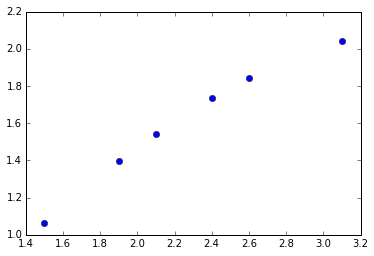

In [7]:
import sys
sys.path.append("./../../modules/")
from numpy import array
import numpy as np
from cubicSpline import curvatures
from LUdecomp3 import *
import matplotlib.pyplot as plt

%matplotlib inline

xData = array([1.5, 1.9, 2.1, 2.4, 2.6, 3.1])
yData = array([1.0628, 1.3961, 1.5432, 1.7349, 1.8423, 2.0397])
print curvatures(xData,yData)
plt.plot(xData, yData, 'o')


[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4]
Probar aumentando el grado de m de LSF que minimice la desviacion std

Degree of polynomial ==> 4
Coefficients are:
[ 1.99185568  1.10282373 -1.59056108  0.44812973 -0.01532907]
Std. deviation = 0.00951925073521
x_mean = 0.7  y_mean = 1.9874375


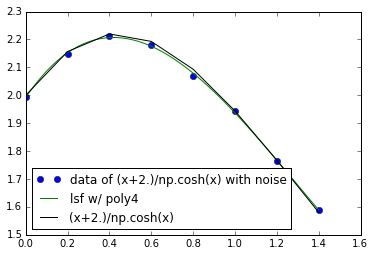

Derivada en x=0
Derivada de  (x+2.)/np.cosh(x) en x=0
evaluado:  1.0
numerico:  1.10282372835
Derivada de  (x+2.)/np.cosh(x) en x=1
evaluado:  -0.83260876903
numerico:  -0.79522551407


In [4]:
import sys
sys.path.append("./../../modules/")
from numpy import array
import numpy as np
from polyFit import *
import matplotlib.pyplot as plt

%matplotlib inline

f = lambda x: (x+2.)/np.cosh(x)
dfdx = lambda x: (1-(x+2.)*np.tanh(x))/np.cosh(x)
lsf_dfdx = lambda x,coeff: sum(coeff[i+1]*(i+1)*x**i for i in range(len(coeff)-1) )

xData = np.array([0.2*i for i in range(0,8)])
print xData

yData = array([1.9934, 2.1465, 2.2129, 2.1790, 2.0683, 1.9448, 1.7655,1.5891])

xPlot = np.linspace(min(xData), max(xData), num=100)
print "Probar aumentando el grado de m de LSF que minimice la desviacion std"
m = eval(raw_input("\nDegree of polynomial ==> "))
coeff = polyFit(xData,yData,m)
print "Coefficients are:\n",coeff
print "Std. deviation =",stdDev(coeff,xData,yData)
print "x_mean =",mean(xData)," y_mean =",mean(yData)
#lsf = lambda x: coeff[i]*x**i for i in range(len(coeff)) # Target function"
yPlot = array([ sum([p[1]*(xPlot[i]**p[0]) for p in enumerate(coeff)]) for i in range(len(xPlot)) ])
plt.plot(xData, yData, 'o', xPlot, yPlot , '-',xData,f(xData),'k')
plt.legend(['data of (x+2.)/np.cosh(x) with noise', 'lsf w/ poly%d'%(m),'(x+2.)/np.cosh(x)'], loc='best')
plt.show()
print "Derivada en x=0"
print "Derivada de  (x+2.)/np.cosh(x) en x=0"
print "evaluado: ", dfdx(0)
print "numerico: ", lsf_dfdx(0,coeff)
print "Derivada de  (x+2.)/np.cosh(x) en x=1"
print "evaluado: ", dfdx(1)
print "numerico: ", lsf_dfdx(1,coeff)


